<a href="https://colab.research.google.com/github/SakibSumon/Predictive-Quality-Assessment-for-Metal-Parts-Using-Machine-Learning/blob/main/ML_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi there

In [ ]:
import numpy as np # A useful package for dealing with mathematical processes
import sklearn.datasets # sklearn is an important package for much of the ML we will be doing, but this time we are only interested in its datasets
import pandas as pd # a common package for viewing tabular data
import seaborn as sns # A popular package for data visualisation
import matplotlib.pyplot as plt # A popular package for visualisation in python. While quite easy to use for basic functions, you can also do some quite impressive things using it.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


**Data Exploration**

In [ ]:
company_data = pd.read_csv('COMP1801_Coursework_Dataset.csv')
company_data.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1469.17,Nozzle,equiGrain,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,Bottom,Die
1,1793.64,Block,singleGrain,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,Bottom,Investment
2,700.60,Blade,equiGrain,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,Bottom,Investment
3,1082.10,Nozzle,colGrain,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,Top,Continuous
4,1838.83,Blade,colGrain,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,Top,Die


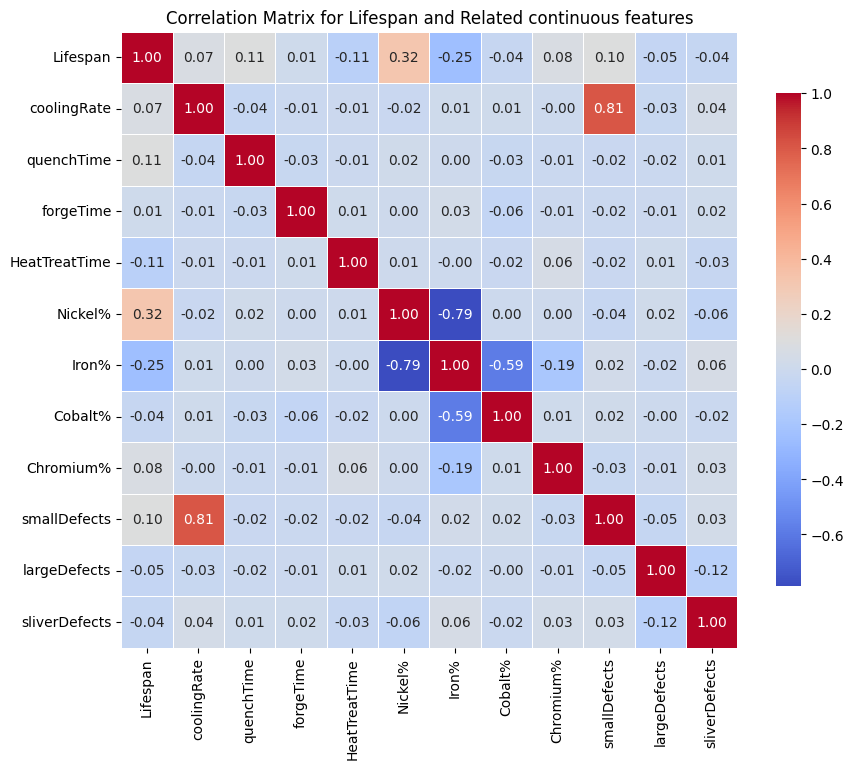

In [ ]:
correlation_features = ['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects',
                        'largeDefects', 'sliverDefects']
correlation_matrix = company_data[correlation_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

plt.title("Correlation Matrix for Lifespan and Related continuous features")
plt.show()


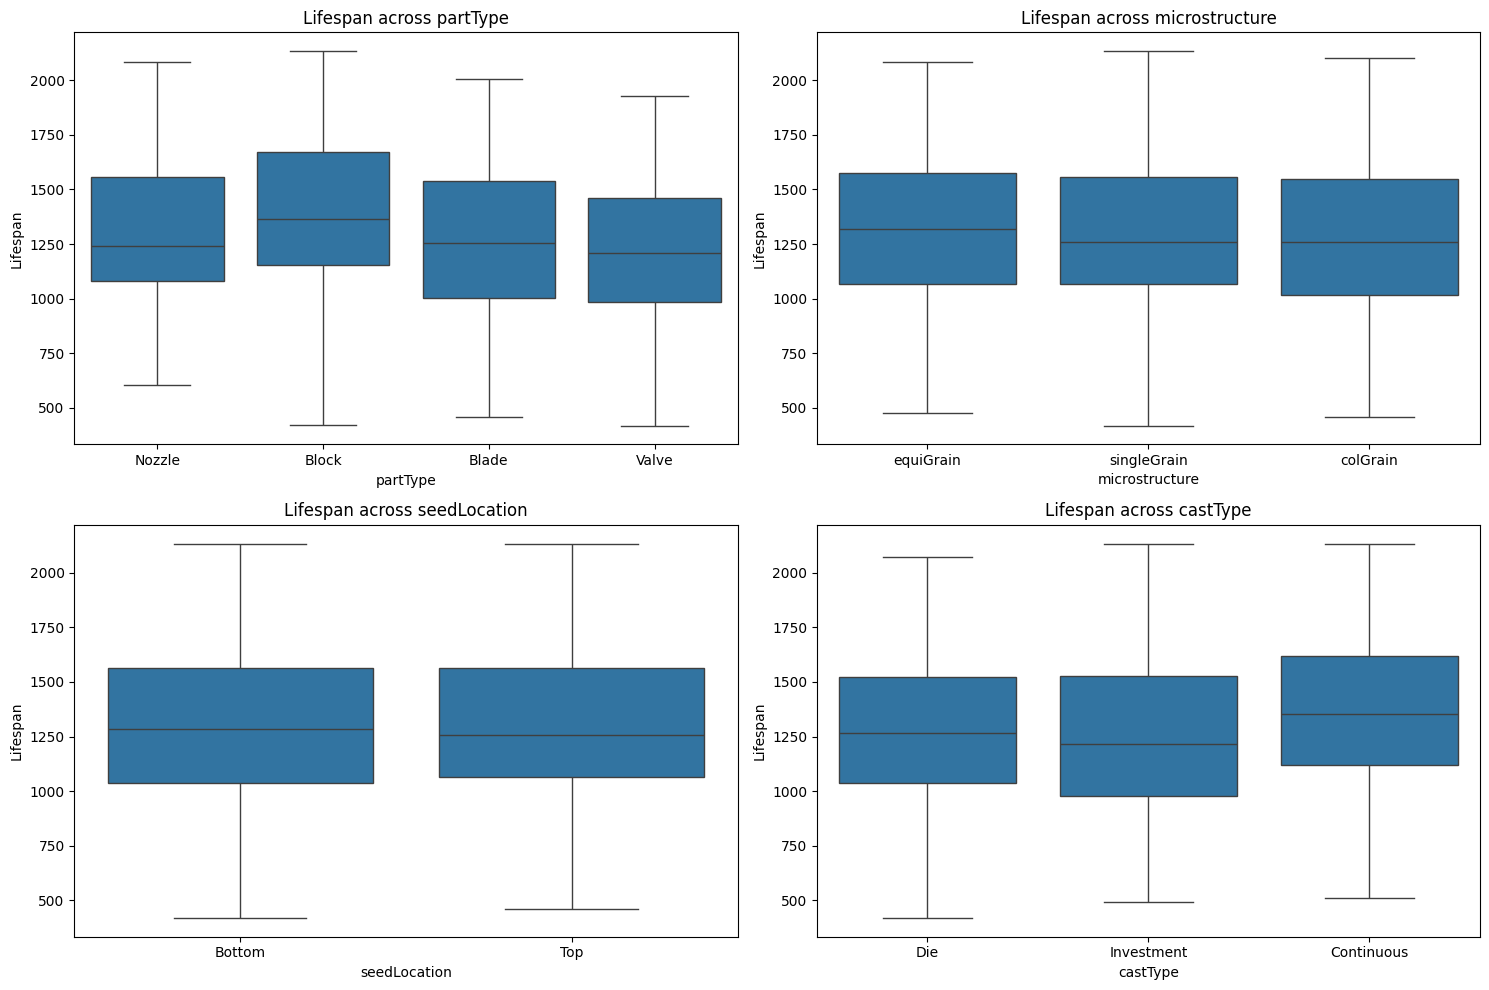

In [ ]:
plt.figure(figsize=(15, 10))

# Define the categorical columns to plot against Lifespan
categorical_features = ['partType', 'microstructure', 'seedLocation', 'castType']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid for the plots
    sns.boxplot(data=company_data, x=feature, y='Lifespan')
    plt.title(f"Lifespan across {feature}")

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 12))
processing_features = ['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime']
elemental_features = ['Nickel%', 'Iron%', 'Cobalt%', 'Chromium%']
defective_features = ['smallDefects', 'largeDefects', 'sliverDefects']

<Figure size 1500x1200 with 0 Axes>

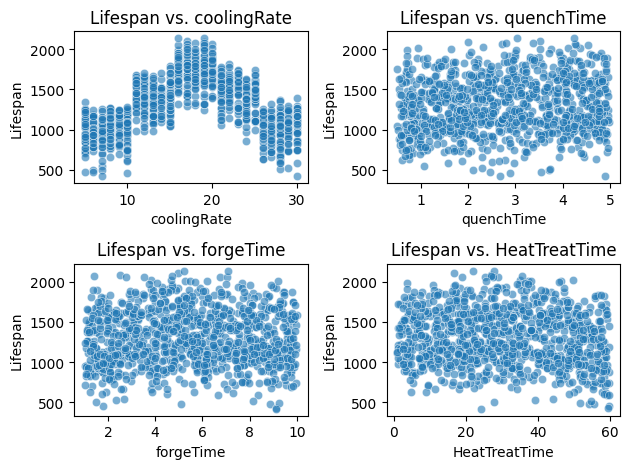

In [ ]:
for i, feature in enumerate(processing_features, 1):
    plt.subplot(2, 2, i)  # Arrange in a 2x2 grid
    sns.scatterplot(data=company_data, x=feature, y='Lifespan', alpha=0.6)
    plt.title(f"Lifespan vs. {feature}")

plt.tight_layout()  # Adjust layout for clarity
plt.show()

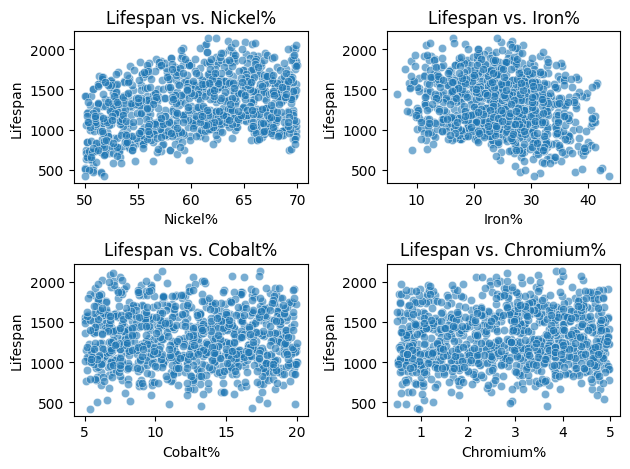

In [ ]:
for i, feature in enumerate(elemental_features, 1):
    plt.subplot(2, 2, i)  # Arrange in a 2x2 grid
    sns.scatterplot(data=company_data, x=feature, y='Lifespan', alpha=0.6)
    plt.title(f"Lifespan vs. {feature}")

plt.tight_layout()  # Adjust layout for clarity
plt.show()

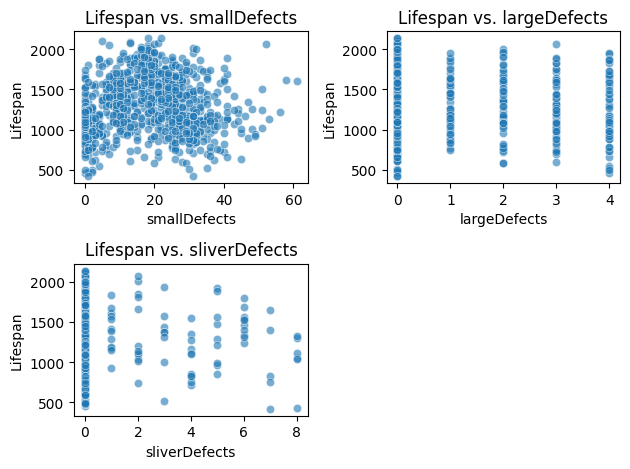

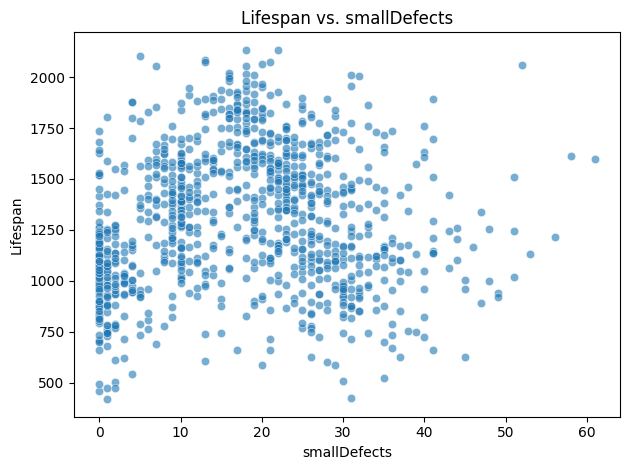

In [ ]:
for i, feature in enumerate(defective_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=company_data, x=feature, y='Lifespan', alpha=0.6)
    plt.title(f"Lifespan vs. {feature}")

plt.tight_layout()
plt.show()

# plt.subplot(2,2,1)
sns.scatterplot(data=company_data, x='smallDefects', y='Lifespan', alpha=0.6)
plt.title(f"Lifespan vs. smallDefects")
plt.tight_layout()
plt.show()

**Methodology**
Pre processing: Feature Selection, Categorical Feature Encoding

In [ ]:
# List of features to exclude
features_to_exclude = ['forgeTime', 'Cobalt%', 'Chromium%', 'microstructure','seedLocation', 'sliverDefects']

# Dropping the specified columns
data = company_data.drop(columns=features_to_exclude)

encoded_data = pd.get_dummies(data, columns=['partType', 'castType'], drop_first=True).astype(int)
display(encoded_data)

,Lifespan,coolingRate,quenchTime,HeatTreatTime,Nickel%,Iron%,smallDefects,largeDefects,partType_Block,partType_Nozzle,partType_Valve,castType_Die,castType_Investment
0,1469,13,3,46,65,16,10,0,0,1,0,1,0
1,1793,19,2,44,54,35,19,0,1,0,0,0,1
2,700,28,0,9,51,35,35,3,0,0,0,0,1
3,1082,9,2,20,57,23,0,1,0,1,0,0,0
4,1838,16,4,16,59,27,10,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1217,5,1,34,68,20,0,0,1,0,0,0,1
996,742,10,0,46,51,32,1,0,1,0,0,0,1
997,1448,17,3,59,54,33,16,1,0,1,0,0,1
998,1099,23,4,17,50,31,11,0,0,0,1,0,0


In [ ]:
scaler = StandardScaler()
X = encoded_data.drop(columns=['Lifespan'])
y = encoded_data['Lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




In [ ]:
#hyper parameter tuning
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Random Forest Model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Randomized Search
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fit model and store results
rf_search.fit(X_train, y_train)


rf_results = pd.DataFrame(rf_search.cv_results_).sort_values(by="rank_test_score")
print("Top Random Forest Configurations:")
print(rf_results[['params', 'mean_test_score', 'rank_test_score']].head(10))

# Best Model
print("Best Parameters for Random Forest:", rf_search.best_params_)
best_rf_model = rf_search.best_estimator_

# Extract results from RandomizedSearchCV
rf_results = pd.DataFrame(rf_search.cv_results_).sort_values(by="rank_test_score")

# Select and organize relevant columns
rf_table = rf_results[["param_n_estimators", "param_max_depth", "param_min_samples_split",
                       "param_min_samples_leaf", "param_max_features", "param_bootstrap",
                       "mean_test_score", "std_test_score", "rank_test_score"]]

# Rename columns for clarity
rf_table.columns = ["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf",
                    "max_features", "bootstrap", "mean_test_score", "std_test_score", "rank"]

# Display the top 10 configurations
print("Top 10 Hyperparameter Configurations for Random Forest:")
print(rf_table.head(10))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Top Random Forest Configurations:
                                               params  mean_test_score  \
44  {'n_estimators': 500, 'min_samples_split': 2, ...     -8036.550933   
27  {'n_estimators': 500, 'min_samples_split': 2, ...     -8119.716710   
43  {'n_estimators': 200, 'min_samples_split': 2, ...     -8145.743970   
0   {'n_estimators': 200, 'min_samples_split': 5, ...     -8253.214367   
7   {'n_estimators': 200, 'min_samples_split': 10,...     -8672.470969   
5   {'n_estimators': 500, 'min_samples_split': 10,...     -8693.394242   
3   {'n_estimators': 100, 'min_samples_split': 10,...     -8792.647840   
93  {'n_estimators': 200, 'min_samples_split': 5, ...     -8902.892555   
45  {'n_estimators': 200, 'min_samples_split': 5, ...     -8907.587666   
57  {'n_estimators': 50, 'min_samples_split': 10, ...     -8924.762386   

    rank_test_score  
44                1  
27                2  
43                3  


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


xgb = XGBRegressor(random_state=42)

# Define hyperparameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': np.logspace(-3, 1, 5),
    'reg_alpha': np.logspace(-3, 1, 5)
}

# Randomized Search
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_xgb,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=3,                    # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)


xgb_search.fit(X_train, y_train)

# Get Results
xgb_results = pd.DataFrame(xgb_search.cv_results_).sort_values(by="rank_test_score")
print("Top XGBoost Configurations:")
print(xgb_results[['params', 'mean_test_score', 'rank_test_score']].head(10))

# Best Model
print("Best Parameters for XGBoost:", xgb_search.best_params_)

best_xgb_model = xgb_search.best_estimator_

xgb_results = pd.DataFrame(xgb_search.cv_results_).sort_values(by="rank_test_score")

xgb_table = xgb_results[["param_learning_rate", "param_n_estimators", "param_max_depth",
                         "param_subsample", "param_colsample_bytree", "param_reg_lambda",
                         "param_reg_alpha", "mean_test_score", "std_test_score", "rank_test_score"]]

xgb_table.columns = ["learning_rate", "n_estimators", "max_depth", "subsample", "colsample_bytree",
                     "lambda", "alpha", "mean_test_score", "std_test_score", "rank"]

print("Top 10 Hyperparameter Configurations for XGBoost:")
print(xgb_table.head(10))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Top XGBoost Configurations:
                                               params  mean_test_score  \
70  {'subsample': 1.0, 'reg_lambda': 0.01, 'reg_al...     -4529.548926   
23  {'subsample': 0.8, 'reg_lambda': 0.01, 'reg_al...     -4580.371525   
8   {'subsample': 0.8, 'reg_lambda': 10.0, 'reg_al...     -4622.421543   
85  {'subsample': 0.8, 'reg_lambda': 10.0, 'reg_al...     -4643.473184   
93  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...     -4655.812040   
26  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...     -4706.672952   
28  {'subsample': 1.0, 'reg_lambda': 0.001, 'reg_a...     -4739.696335   
18  {'subsample': 1.0, 'reg_lambda': 10.0, 'reg_al...     -4764.557275   
98  {'subsample': 1.0, 'reg_lambda': 0.001, 'reg_a...     -4849.612410   
29  {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...     -4925.588614   

    rank_test_score  
70                1  
23                2  
8                 3  
85    

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
rf_predictions = best_rf_model.predict(X_test)
xgb_predictions = best_xgb_model.predict(X_test)

# Metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Print results
print("Random Forest Results:")
print(f"MAE: {rf_mae}, MSE: {rf_mse}, R²: {rf_r2}")

print("\nGradient Boosting Results:")
print(f"MAE: {xgb_mae}, MSE: {xgb_mse}, R²: {xgb_r2}")


Random Forest Results:
MAE: 68.29566091666668, MSE: 7299.507726695169, R²: 0.9295105748038264

Gradient Boosting Results:
MAE: 54.2841618347168, MSE: 4557.237124047321, R²: 0.9559919834136963


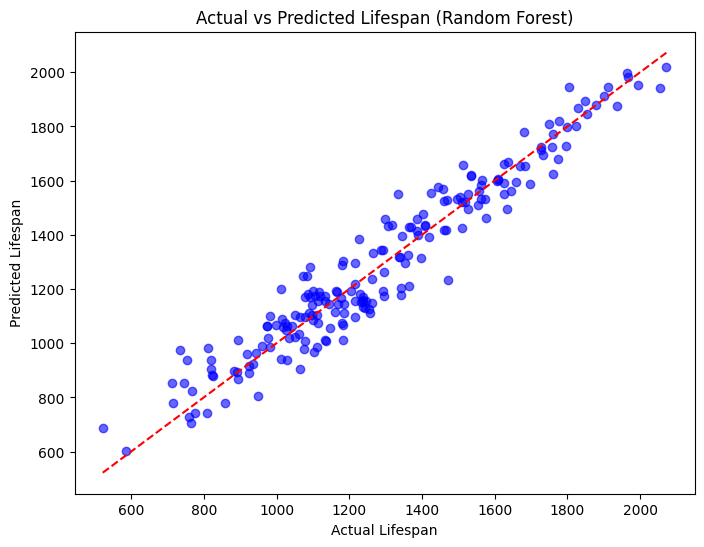

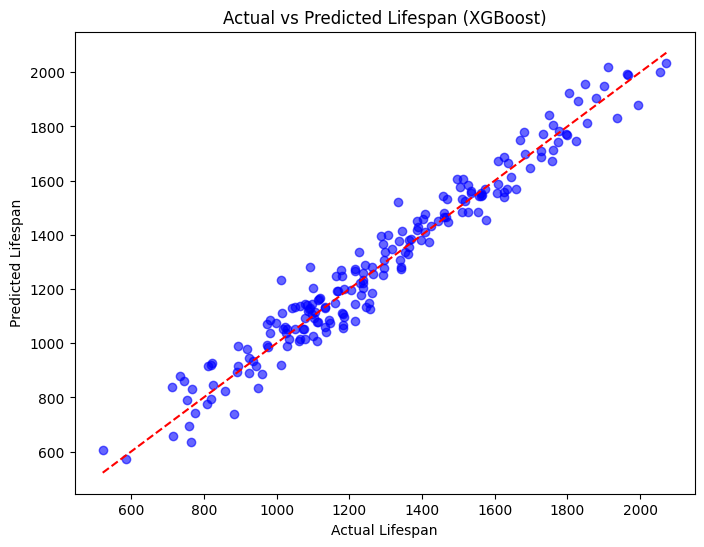

In [ ]:
import matplotlib.pyplot as plt


def plot_actual_vs_predicted(y_test, predictions, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, color='blue', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # line y = x for perfect predictions
    plt.title(f'Actual vs Predicted Lifespan ({model_name})')
    plt.xlabel('Actual Lifespan')
    plt.ylabel('Predicted Lifespan')
    plt.show()

# Plot for Random Forest
plot_actual_vs_predicted(y_test, rf_predictions, 'Random Forest')

# Plot for Gradient Boosting (XGBoost)
plot_actual_vs_predicted(y_test, xgb_predictions, 'XGBoost')


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('COMP1801_Coursework_Dataset.csv')

# 1. Create the '1500_labels' column
df['1500_labels'] = (df['Lifespan'] > 1500).astype(int)

# 2. Exclude unwanted columns
columns_to_exclude = ['forgeTime', 'Cobalt%', 'Chromium%', 'microstructure', 'seedLocation', 'sliverDefects']
df = df.drop(columns=columns_to_exclude)

# 3. One-hot encode categorical columns ('castType' and 'partType')
df = pd.get_dummies(df, columns=['castType', 'partType'], drop_first=True)
df = df.astype(int)


df.head()

,Lifespan,coolingRate,quenchTime,HeatTreatTime,Nickel%,Iron%,smallDefects,largeDefects,1500_labels,castType_Die,castType_Investment,partType_Block,partType_Nozzle,partType_Valve
0,1469,13,3,46,65,16,10,0,0,1,0,0,1,0
1,1793,19,2,44,54,35,19,0,1,0,1,1,0,0
2,700,28,0,9,51,35,35,3,0,0,1,0,0,0
3,1082,9,2,20,57,23,0,1,0,0,0,0,1,0
4,1838,16,4,16,59,27,10,0,1,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Lifespan', '1500_labels'])
y = df['1500_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000, 2000, 3000, 4000]
}


grid_search_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_lr.fit(X_train, y_train)


print(f"Best parameters: {grid_search_lr.best_params_}")

results = grid_search_lr.cv_results_

# Create a DataFrame with relevant information: Mean Test Score and Hyperparameters
results_df = pd.DataFrame({
    'Mean Test Score': results['mean_test_score'],
    'C': results['param_C'],
    'Solver': results['param_solver'],
    'Max Iter': results['param_max_iter']
})


top_10_results = results_df.sort_values(by='Mean Test Score', ascending=False).head(10)

# Display the top 10 hyperparameter combinations
print(top_10_results)


Best parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
    Mean Test Score     C     Solver  Max Iter
18          0.69500  0.01  liblinear      2000
16          0.69500  0.01  liblinear      1000
22          0.69500  0.01  liblinear      4000
14          0.69500  0.01  liblinear       500
12          0.69500  0.01  liblinear       100
20          0.69500  0.01  liblinear      3000
26          0.68625  0.10  liblinear       500
21          0.68625  0.01       saga      3000
23          0.68625  0.01       saga      4000
24          0.68625  0.10  liblinear       100


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 500, 1000, 5000, 10000]
}

grid_search_ann = RandomizedSearchCV(MLPClassifier(), param_grid_ann, cv=5, scoring='accuracy')
grid_search_ann.fit(X_train, y_train)


results = grid_search_ann.cv_results_

print(f"Best parameters: {grid_search_ann.best_params_}")


results_df = pd.DataFrame({
    'Mean Test Score': results['mean_test_score'],
    'Hidden Layer Sizes': results['param_hidden_layer_sizes'],
    'Activation': results['param_activation'],
    'Learning Rate Init': results['param_learning_rate_init'],
    'Max Iter': results['param_max_iter']
})


top_10_results = results_df.sort_values(by='Mean Test Score', ascending=False).head(10)

# Display the top 10 hyperparameter combinations
print(top_10_results)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters: {'max_iter': 500, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (50,), 'activation': 'logistic'}
   Mean Test Score Hidden Layer Sizes Activation  Learning Rate Init  Max Iter
0          0.88625              (50,)   logistic               0.010       500
2          0.87500              (50,)       relu               0.001       500
4          0.86875         (100, 100)       relu               0.001       100
1          0.86750              (50,)       tanh               0.010      1000
8          0.86625             (100,)       relu               0.010       500
9          0.86500           (50, 50)       relu               0.001      5000
3          0.86125              (50,)   logistic               0.100       500
5          0.85750           (50, 50)       relu               0.010       500
6          0.83625           (50, 50)       tanh               0.100       500
7          0.82375           (50, 50)       tanh               0.100      5000


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Logistic Regression
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Evaluate ANN
y_pred_ann = grid_search_ann.best_estimator_.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)

# Display evaluation metrics
metrics_lr = [accuracy_lr, precision_lr, recall_lr, f1_lr]
metrics_ann = [accuracy_ann, precision_ann, recall_ann, f1_ann]

metrics_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'ANN'],
    'Accuracy': [accuracy_lr, accuracy_ann],
    'Precision': [precision_lr, precision_ann],
    'Recall': [recall_lr, recall_ann],
    'F1-Score': [f1_lr, f1_ann]
})

print(metrics_table)






                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression     0.725   0.500000  0.218182  0.303797
1                  ANN     0.915   0.865385  0.818182  0.841121
